In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Obtain the NASA airfoil self-noise dataset from UCI machine learning dataset repository.
The dataset describes different size NACA 0012 airfoils at various wind tunnel speeds
and angles of attack. The span of the airfoil and the observer position were the same in
all of the experiments. The following attributes were measured:
1. Frequency, in Hz.

2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.
6. (only output was scaled sound displacement thickness, in meters.)

In [3]:
# (1) Load the NASA airfoil self-noise dataset from UCI.
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat"
# Define column names as per dataset documentation
columns = ["Freq", "AoA", "Chord_len",
           "Free_stream_V", "Suction_side_disp_t","scaled_sound_disp_T"]

data = pd.read_csv(url, delim_whitespace=True, header=None, names=columns)
data.head()

<ipython-input-3-9dcbb5292db9>:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(url, delim_whitespace=True, header=None, names=columns)


,Freq,AoA,Chord_len,Free_stream_V,Suction_side_disp_t,scaled_sound_disp_T
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


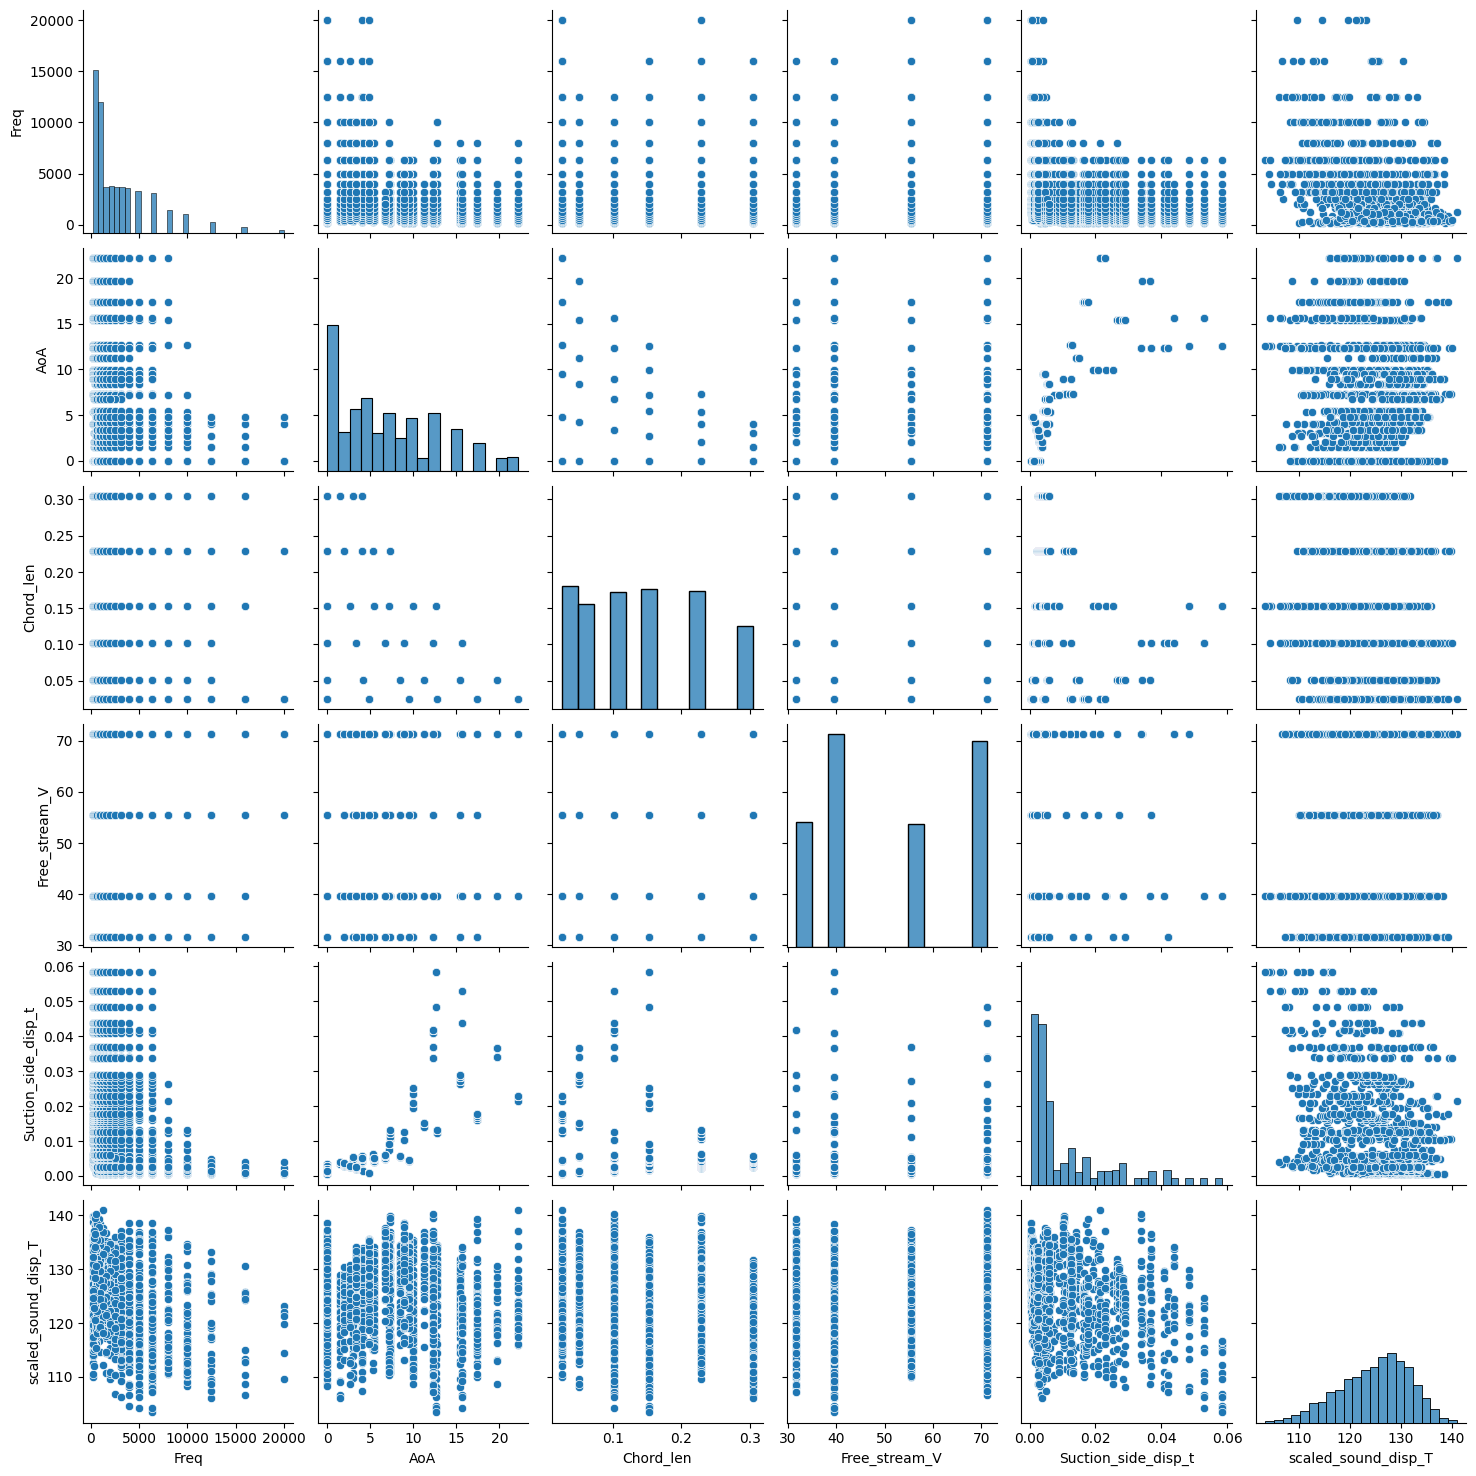

In [4]:
#Visualize the dataset
sns.pairplot(data)
plt.show()

In [5]:
X = data.iloc[:, :5].values  # first five columns features
y = data.iloc[:, 5].values   # last column output

In [6]:
#Construct a fully connected neural network model for estimating scaled sound pressure level, in decibels
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Train the model. A validation split is used on the training set.
history = model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 76157.7344 - val_loss: 6819.2905
Epoch 2/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6702.3442 - val_loss: 6056.8086
Epoch 3/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5981.9272 - val_loss: 5295.9536
Epoch 4/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5295.8945 - val_loss: 3722.0625
Epoch 5/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3836.8274 - val_loss: 2944.1377
Epoch 6/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3043.6267 - val_loss: 2271.2922
Epoch 7/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2949.0920 - val_loss: 1784.5062
Epoch 8/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2006.6750 - val_loss: 1572.7832
Epoch 9/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1717.2430 - val_loss: 1257.3054
Epoch 10/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1651.2239 - val_loss: 1253.5012
Epoch 11/2000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1269.3014 - val_

In [8]:
#Calculate the coefficient of determination
from sklearn.metrics import r2_score

y_pred = model.predict(X_test).flatten()
r2 = r2_score(y_test, y_pred)
print(r2)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
0.4323651186981804
